# Práctica 2: Introducción al procesamiento de imágenes
## Análisis y procesado de imágenes clínicas
## Leticia Sáez Viadero y Pablo Rocamora García

In [1]:
#Importación de librerías
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Img a:  (256, 256)
Img b:  (256, 256)
uint8


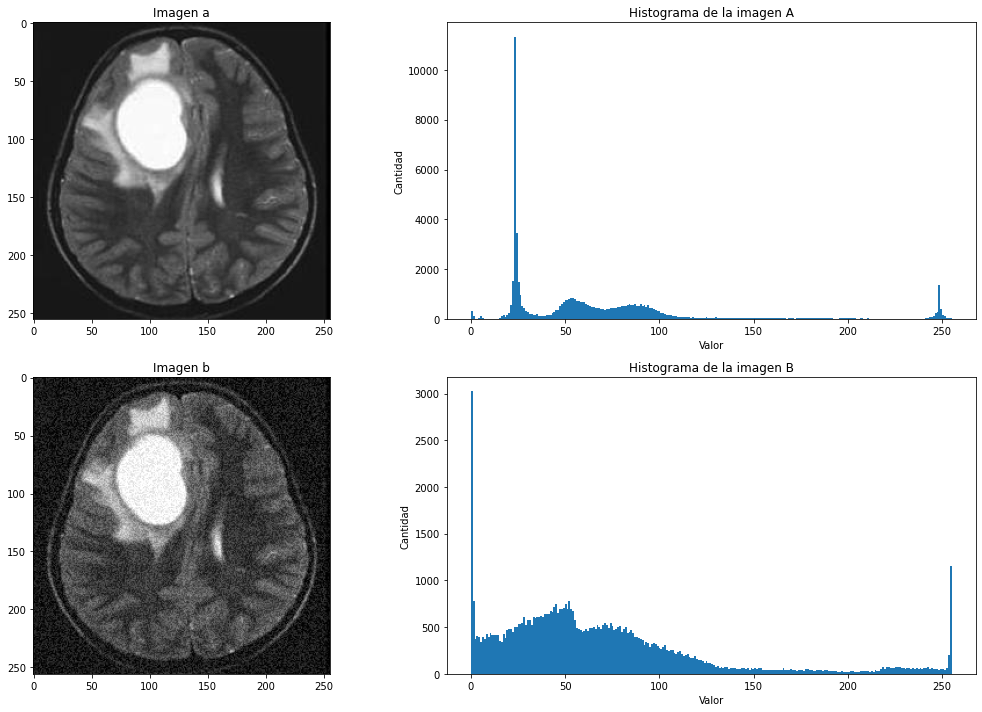

In [2]:
#Lectura de archivos
img_a = cv.imread('../input/p2-segmentacion-apic/a.jpg')
img_b = cv.imread('../input/p2-segmentacion-apic/b.jpg')

#Tamaño de las imagnes
# print('Img a: ', img_a.shape)
# print('Img b: ', img_b.shape)

#Conversion a blanco y negro
img_a = cv.cvtColor(img_a, cv.COLOR_BGR2GRAY)
img_b = cv.cvtColor(img_b, cv.COLOR_BGR2GRAY)

#FOrma de las imagnes
print('Img a: ', img_a.shape)
print('Img b: ', img_b.shape)
print(img_a.dtype)

#Visualizacion de las imagenes
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_a, cmap='gray')
plt.title('Imagen a')

plt.subplot(2, 2, 2)
plt.hist(img_a.ravel(),256)
plt.title('Histograma de la imagen A')
plt.xlabel('Valor'),
plt.ylabel('Cantidad')

plt.subplot(2, 2, 3)
plt.imshow(img_b, cmap='gray')
plt.title('Imagen b')

plt.subplot(2, 2, 4)
plt.hist(img_b.ravel(),256)
plt.title('Histograma de la imagen B')
plt.xlabel('Valor'),
plt.ylabel('Cantidad')

plt.tight_layout()
plt.savefig('imagen 1')
plt.show()


## Cuestión 1
Utilizad los filtros y técnicas explicadas en la teoría segmenta los tumores de las siguientes imágenes
(nótese la presencia de ruido en la figura b). A partir de la segmentación extraed el bounding box del 
tumor y dibujarlo SOBRE la imagen original

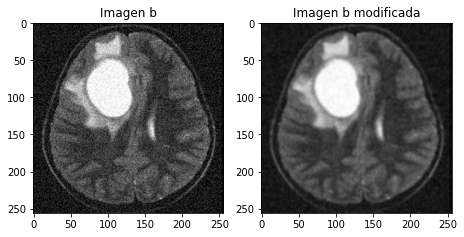

In [3]:
img_b_suav_1 = cv.GaussianBlur(img_b,(3, 3),0).ravel().astype('int64')#Filtrado gaussiano
img_b_suav_2 = cv.GaussianBlur(img_b,(5, 5),0).ravel().astype('int64')#Filtrado gaussiano
img_b_suav_3 = cv.GaussianBlur(img_b,(7, 7),0).ravel().astype('int64')#Filtrado gaussiano
img_b_suav_4 = cv.GaussianBlur(img_b,(9, 9),0).ravel().astype('int64')#Filtrado gaussiano

img_b_m = np.array([(img_b_suav_1[i] + img_b_suav_2[i]+ img_b_suav_3[i]+ img_b_suav_4[i])//4 for i in range(65536)])
img_b_m = np.reshape(img_b_m, (256,256))
img_b_m  = img_b_m.astype('uint8')

plt.figure(figsize = (7.5, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_b, 'gray')
plt.title('Imagen b')
plt.subplot(1, 2, 2)
plt.imshow(img_b_m, 'gray')
plt.title('Imagen b modificada')
plt.show()

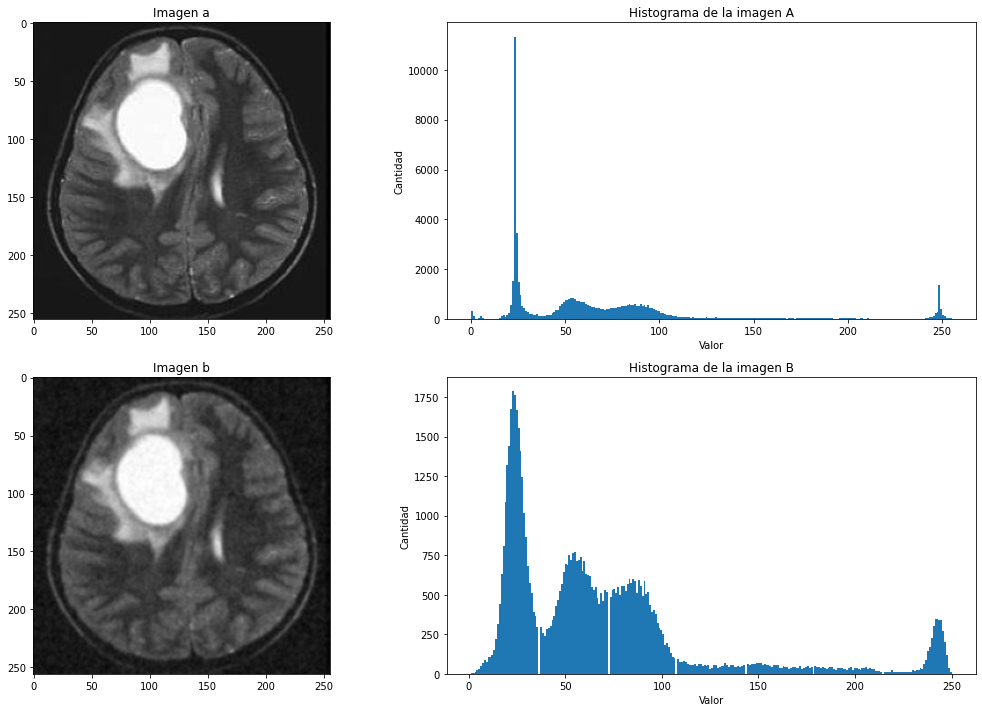

In [4]:
#Visualizacion de las imagenes
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_a, cmap='gray')
plt.title('Imagen a')

plt.subplot(2, 2, 2)
plt.hist(img_a.ravel(),256)
plt.title('Histograma de la imagen A')
plt.xlabel('Valor'),
plt.ylabel('Cantidad')

plt.subplot(2, 2, 3)
plt.imshow(img_b_m, cmap='gray')
plt.title('Imagen b')

plt.subplot(2, 2, 4)
plt.hist(img_b_m.ravel(),256)
plt.title('Histograma de la imagen B')
plt.xlabel('Valor'),
plt.ylabel('Cantidad')

plt.tight_layout()
plt.savefig('imagen 1')
plt.show()

## Thresholding

Imagen A


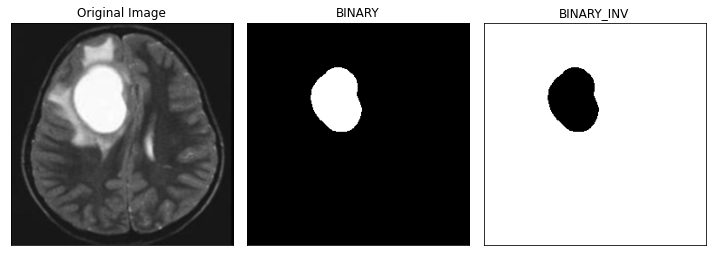

Imagen B: Se ha aplicado un filtrado gaussiano con kernel de 7x7 asi como un thresholding con umbrales 240 y 255 minimo y maximo respectivamente y dilatacion y erosion 


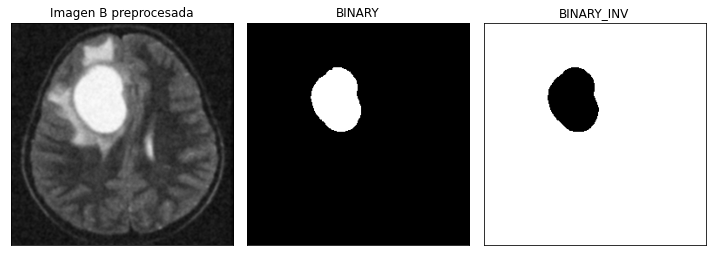

In [5]:
### Simple thresholding
# Se han seleccionado los valores umbral minimo y maximo 240 y 255 respectivamente 
# dado que las zonas de la imagen que contienen el tumor poseen color 
# blanco(representado con valores cercanos al 255). 
# Al utilizar estos umbrales se logra separar la region que contiene el tumor del resto.

#Para la imagen A
print('Imagen A')
img = cv.GaussianBlur(img_a,(3, 3),0)#Filtrado gaussiano
ret,thresh1 = cv.threshold(img,226,255,cv.THRESH_BINARY)#Thresholding 1
ret,thresh2 = cv.threshold(img,226,255,cv.THRESH_BINARY_INV)#Thresholding 2
#Visualizacion
titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


#Para la imagen B
print('Imagen B: Se ha aplicado un filtrado gaussiano con kernel de 7x7 asi como un thresholding con umbrales 240 y 255 minimo y maximo respectivamente y dilatacion y erosion ')


ret,thresh1 = cv.threshold(img_b_m,226,255,cv.THRESH_BINARY)#Thresholding 1


ret,thresh2 = cv.threshold(img,226,255,cv.THRESH_BINARY_INV)#Thresholding 2


#Visualizacion
titles = ['Imagen B preprocesada','BINARY','BINARY_INV']
images = [img_b_m, thresh1, thresh2]
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

Adaptative thresholding image A


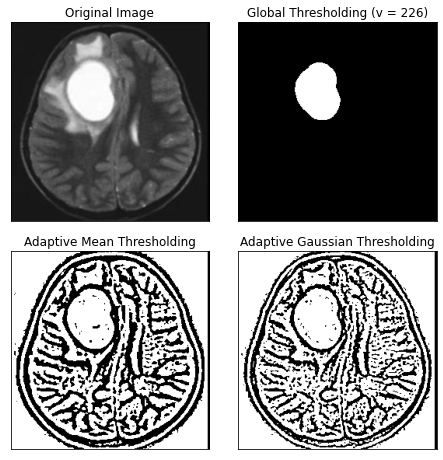

Adaptative thresholding image B


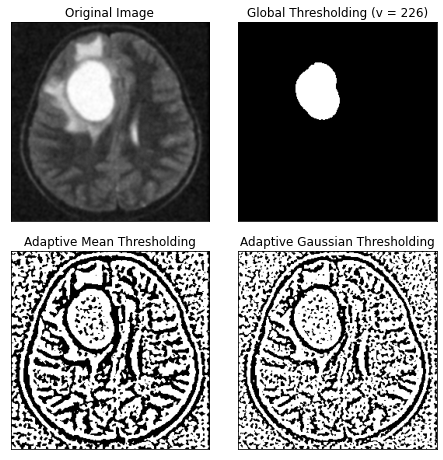

In [6]:
#Adaptative thresholding
def adaptativeThresholding(img, kernel_size = (3,3)):
    img = cv.GaussianBlur(img,kernel_size,0)
    ret,th1 = cv.threshold(img,226,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img, 255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 226)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    plt.figure(figsize=(6.5,6.5))
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.tight_layout()
    plt.show()

    
    
print('Adaptative thresholding image A')
adaptativeThresholding(img_a)
print('Adaptative thresholding image B')
adaptativeThresholding(img_b_m)

Otsu binarization image a


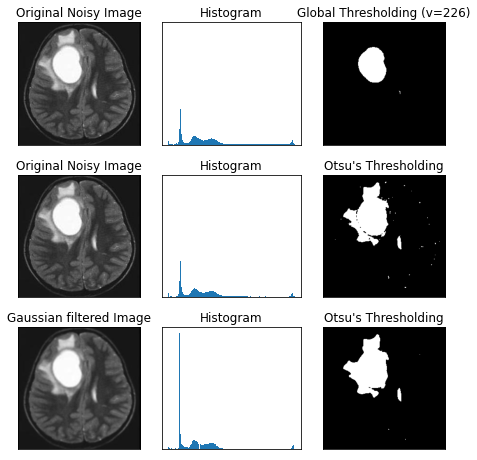

Otsu binarization image b


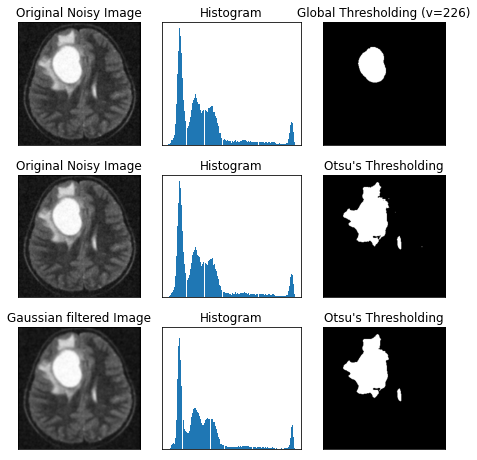

In [7]:
def otsuBinarization(img):
    # global thresholding
    ret1,th1 = cv.threshold(img,226,255,cv.THRESH_BINARY)
    # Otsu's thresholding
    ret2,th2 = cv.threshold(img,250,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv.threshold(blur,226,200,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # plot all the images and their histograms
    images = [img, 0, th1, img, 0, th2, blur, 0, th3]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=226)',
              'Original Noisy Image','Histogram',"Otsu's Thresholding",
              'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
    plt.figure(figsize=(6.5,6.5))
    for i in range(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    
print('Otsu binarization image a')
otsuBinarization(img_a)
print('Otsu binarization image b')
otsuBinarization(img_b_m)

## Region growing

import cv2
import numpy as np

def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1
    
    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    return out

def region_growing(img, seed):
    seed_points = []
    outimg = np.zeros_like(img)
    seed_points.append((seed[0], seed[1]))
    processed = []
    while(len(seed_points) > 0):
        pix = seed_points[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    seed_points.append(coord)
                processed.append(coord)
        seed_points.pop(0)
        #cv2.imshow("progress",outimg)
        #cv2.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Seed: ' + str(x) + ', ' + str(y), img[y,x]) 
        clicks.append((y,x))
def region_growing_seg(img):       
    clicks = []
    
    ret, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    cv2.namedWindow('Input')
    cv2.setMouseCallback('Input', on_mouse, 0, )
    cv2.imshow('Input', img)
    cv2.waitKey()
    seed = clicks[-1]
    out = region_growing(img, seed)
    cv2.imshow('Region Growing', out)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
region_growing_seg(img_a)

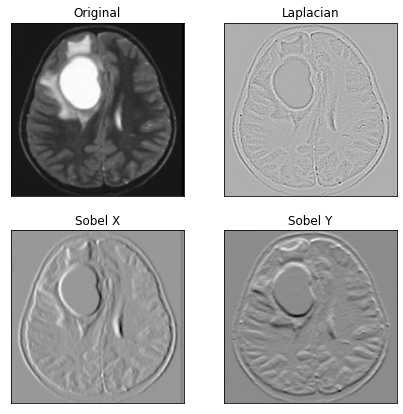

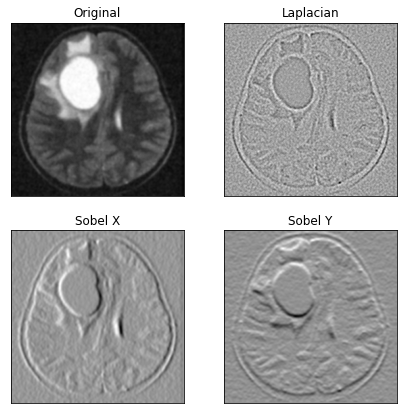

In [8]:
def getSobel_Laplacian(img):
    # remove noise
    img = cv.GaussianBlur(img,(3,3),0)

    # convolute with proper kernels
    laplacian = cv.Laplacian(img,cv.CV_64F)
    sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)  # x
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)  # y
    plt.figure(figsize = (7,7))
    plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()

getSobel_Laplacian(img_a)
getSobel_Laplacian(img_b_m)

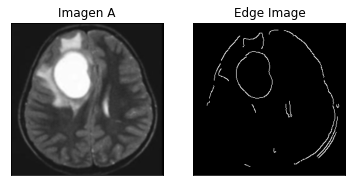

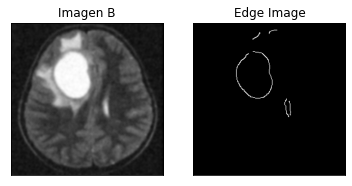

In [9]:

def getEdges(img, nombre):
    img = cv.GaussianBlur(img,(5,5),0)
    edges = cv.Canny(img,150,255)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title(nombre), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
getEdges(img_a, 'Imagen A')
getEdges(img_b_m, 'Imagen B')

## Bounding box

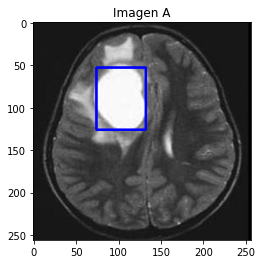

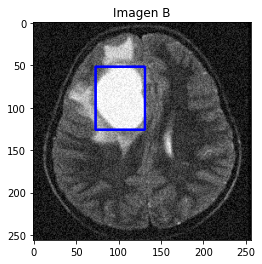

In [10]:
def boundingBox(img_path,titulo, umbral1, umbral2):
    image = cv.imread(img_path)
    

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    if img_path == '/kaggle/input/p2-segmentacion-apic/b.jpg':
        img_b_suav_1 = cv.GaussianBlur(gray,(3, 3),0).ravel().astype('int64')#Filtrado gaussiano
        img_b_suav_2 = cv.GaussianBlur(gray,(5, 5),0).ravel().astype('int64')#Filtrado gaussiano
        img_b_suav_3 = cv.GaussianBlur(gray,(7, 7),0).ravel().astype('int64')#Filtrado gaussiano
        img_b_suav_4 = cv.GaussianBlur(gray,(9, 9),0).ravel().astype('int64')#Filtrado gaussiano

        img_b_m = np.array([(img_b_suav_1[i] + img_b_suav_2[i]+ img_b_suav_3[i]+ img_b_suav_4[i])//4 for i in range(65536)])
        img_b_m = np.reshape(img_b_m, (256,256))
        gray  = img_b_m.astype('uint8')
        
    thresh = cv.threshold(gray, umbral1, umbral2, cv.THRESH_BINARY)[1]

    ROI_number = 1
    cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        x,y,w,h = cv.boundingRect(c)
        image = cv.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
    
    plt.figure()
    plt.imshow(image)
    plt.title(titulo)
    plt.show()

boundingBox('/kaggle/input/p2-segmentacion-apic/a.jpg','Imagen A', 240, 255)
boundingBox('/kaggle/input/p2-segmentacion-apic/b.jpg','Imagen B', 226, 255)

## Kmeans

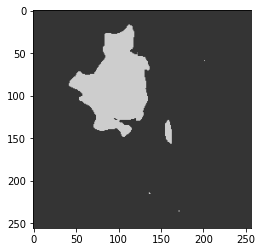

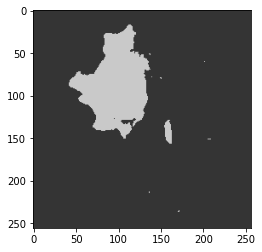

In [11]:
import numpy as np
import cv2 as cv

def getKMeans(img, K):
    img = cv.GaussianBlur(img,(5,5),0)
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)#10 1.0
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    plt.imshow(res2)
    plt.show()
    
    
img_a = cv.imread('../input/p2-segmentacion-apic/a.jpg')
img_b = cv.imread('../input/p2-segmentacion-apic/b.jpg')
getKMeans(img_a, 2)
getKMeans(img_b, 2)

## Cuestión 2

Selecciona alguno de los datasets que has buscado para la práctica anterior que tengan un stack de 
imágenes (por ejemplo un CT o una MRI) y que incluyan alguna patología. 
Con los conocimientos de procesamiento de imágenes (filtrado, transformaciones, operadores 
morfológico, segmentación…) segmenta para todo elstack la zona relativa a la patología (ROI, Region 
Of Interest), como en el ejemplo de la Figura 2